# Análisis de sentimiento sobre la salud mental

Este conjunto de datos completo es una colección meticulosamente seleccionada de estados de salud mental etiquetados a partir de varias declaraciones. El conjunto de datos amalgama datos sin procesar de múltiples fuentes, limpios y compilados.
Fuente: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health?resource=download

El conjunto de datos consta de declaraciones etiquetadas con uno de los siguientes siete estados de salud mental:

Normal,
Depression,
Suicidal,
Anxiety,
Stress,
Bi-Polar,
Personality Disorder

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('CombinedData.csv')

In [3]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [4]:
# Contar cuántos valores nulos hay en la columna 'statement'
nulos = df['statement'].isnull().sum()

# Mostrar el número de nulos
print(f"Número de valores nulos en 'statement': {nulos}")



Número de valores nulos en 'statement': 362


In [5]:
# Mostrar una de las filas donde 'statement' es nulo
nulo_ejemplo = df[df['statement'].isnull()]

# Mostrar la fila
nulo_ejemplo


,Unnamed: 0,statement,status
293,293,NaN,Anxiety
572,572,NaN,Anxiety
595,595,NaN,Anxiety
1539,1539,NaN,Normal
2448,2448,NaN,Normal
...,...,...,...
52838,52838,NaN,Anxiety
52870,52870,NaN,Anxiety
52936,52936,NaN,Anxiety
53010,53010,NaN,Anxiety


In [6]:
# Eliminar las filas donde 'statement' es nulo
df = df.dropna(subset=['statement'])

# Mostrar el DataFrame sin los nulos
df.shape


(52681, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  52681 non-null  int64 
 1   statement   52681 non-null  object
 2   status      52681 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [8]:
df["len"]=df['statement'].apply(len) ## crear nueva columna len
df

/tmp/ipykernel_820/3298214969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len"]=df['statement'].apply(len) ## crear nueva columna len


,Unnamed: 0,statement,status,len
0,0,oh my gosh,Anxiety,10
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,64
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78
3,3,I've shifted my focus to something else but I'...,Anxiety,61
4,4,"I'm restless and restless, it's been a month n...",Anxiety,72
...,...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,1766
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety,85
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401


<Axes: xlabel='len', ylabel='Count'>

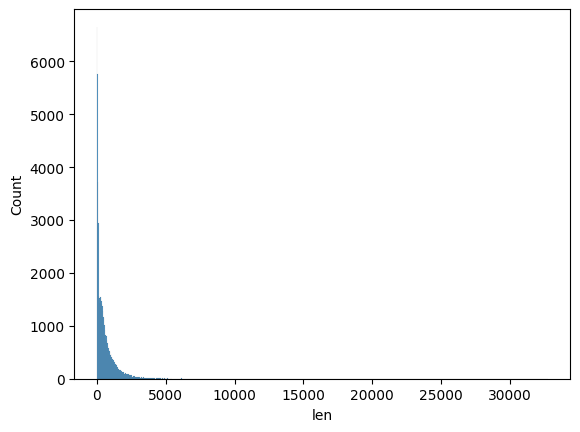

In [9]:
sns.histplot(df["len"])

In [10]:
df["status"].value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

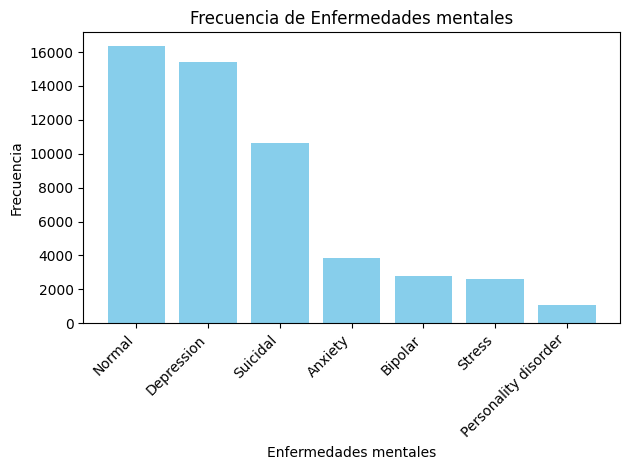

In [11]:
import matplotlib.pyplot as plt

# Contar las frecuencias de cada categoría
frecuencias = df['status'].value_counts()

# Crear el histograma con matplotlib
plt.bar(frecuencias.index, frecuencias.values, color='skyblue')

# Personalizar el gráfico
plt.title('Frecuencia de Enfermedades mentales')
plt.xlabel('Enfermedades mentales')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el layout para evitar que se recorte el gráfico
plt.show()

In [12]:
df.sample()

,Unnamed: 0,statement,status,len
12147,12147,It feels so stupid but it is been a day and a ...,Depression,693


Vamos a crear una columna llamada enfermo, donde no es que el comentario muestra una condición Normal y si cuando el comentario muestra alguna enfermedad mental

In [47]:
df['enfermo'] = df['status'].apply(lambda x: 'si' if x != 'Normal' else 'No')
df


/tmp/ipykernel_820/1925671257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enfermo'] = df['status'].apply(lambda x: 'si' if x != 'Normal' else 'No')


,Unnamed: 0,statement,status,len,enfermo
0,0,oh my gosh,Anxiety,10,si
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,si
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,si
3,3,I've shifted my focus to something else but I'...,Anxiety,61,si
4,4,"I'm restless and restless, it's been a month n...",Anxiety,72,si
...,...,...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,1766,si
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012,si
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety,85,si
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401,si


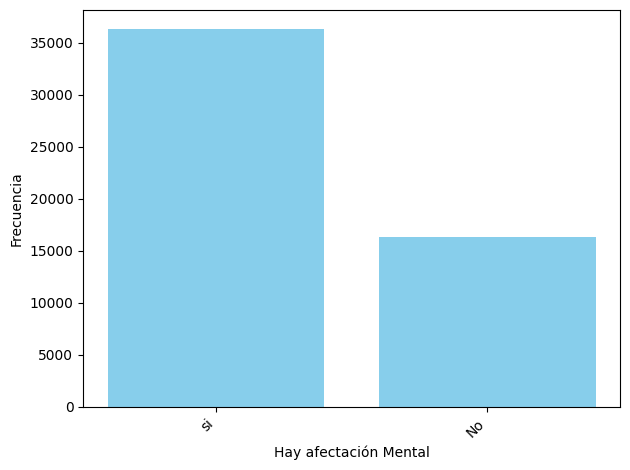

In [49]:
# Contar las frecuencias de cada categoría
frecuencias = df['enfermo'].value_counts()

# Crear el histograma con matplotlib
plt.bar(frecuencias.index, frecuencias.values, color='skyblue')

# Personalizar el gráfico

plt.xlabel('Hay afectación Mental')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el layout para evitar que se recorte el gráfico
plt.show()

# Encontrar palabras mas frecuentes

Encontremos las diez palabras sin stopwrods que aparecen con mayor frecuencia en: (i) todas las reseñas, (ii) En cada enfermedad

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime





In [50]:
def get_top_n_words(corpus:list, n:int=1, k:int=1):
    '''
    Encontrar las n palabras más frecuentes en una lista de comentarios
    '''
    #t1 = datetime.now()
    vec = CountVectorizer(ngram_range=(k, k), stop_words="english")
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [51]:
%%time
# Todos los reviews
common_words = get_top_n_words(df['statement'], 20, 1)
for word, freq in common_words:
    print(word, freq)
    


just 49039
like 38493
feel 31666
want 27355
know 23631
life 22707
time 18303
people 16911
really 16400
going 13892
think 13080
day 11987
don 11770
help 10848
ve 10262
things 9908
did 9880
anymore 9680
anxiety 9571
years 9513
CPU times: user 1.84 s, sys: 0 ns, total: 1.84 s
Wall time: 1.84 s


In [16]:
common_words

[('just', 49039),
 ('like', 38493),
 ('feel', 31666),
 ('want', 27355),
 ('know', 23631),
 ('life', 22707),
 ('time', 18303),
 ('people', 16911),
 ('really', 16400),
 ('going', 13892),
 ('think', 13080),
 ('day', 11987),
 ('don', 11770),
 ('help', 10848),
 ('ve', 10262),
 ('things', 9908),
 ('did', 9880),
 ('anymore', 9680),
 ('anxiety', 9571),
 ('years', 9513)]

<Axes: title={'center': 'Top 20 words'}, xlabel='words'>

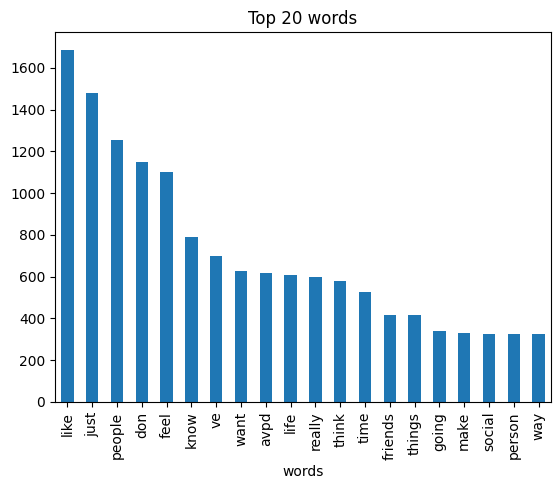

In [44]:
df_common = pd.DataFrame(common_words, columns=["words", "count"])
df_common.groupby("words").sum()["count"].sort_values(ascending=False).plot(
    kind="bar", title="Top 20 words"
)

In [52]:
Enfermedades=df['status'].unique()

In [53]:
Enfermedades[0]

'Anxiety'

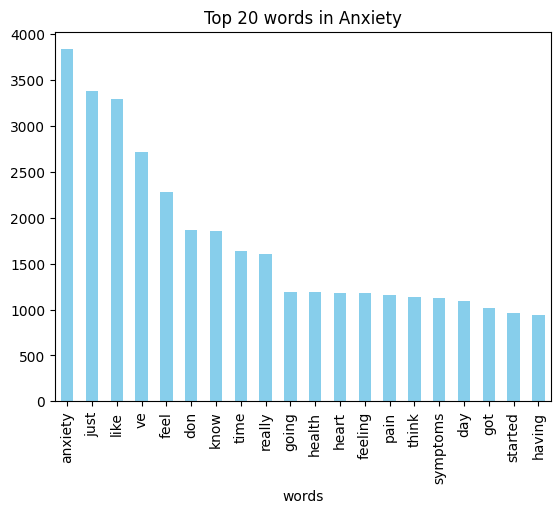

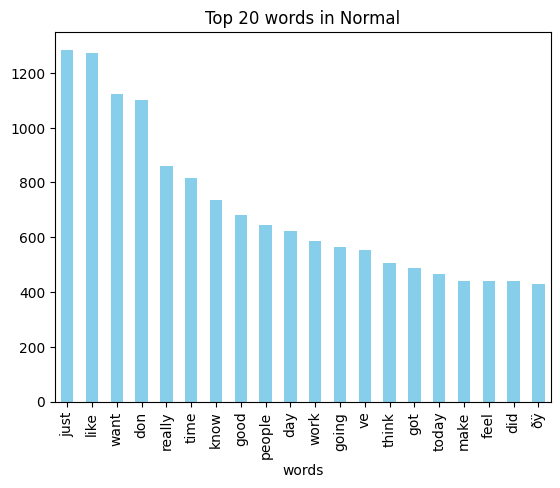

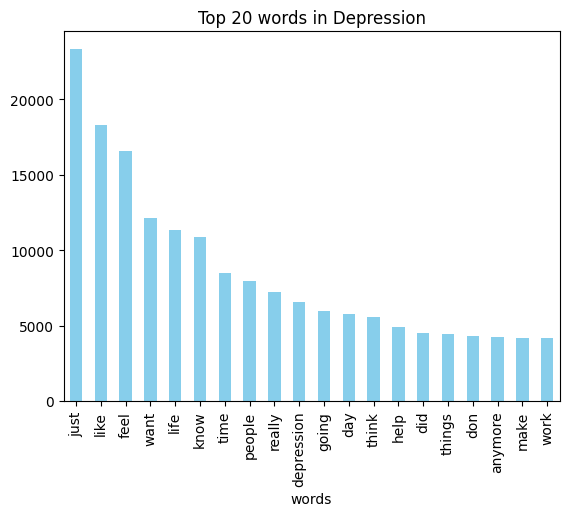

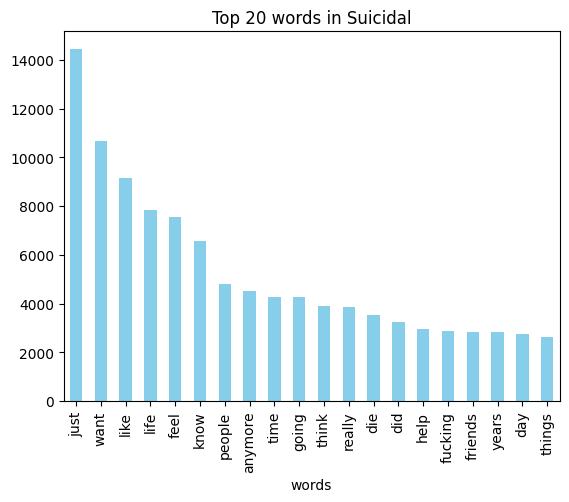

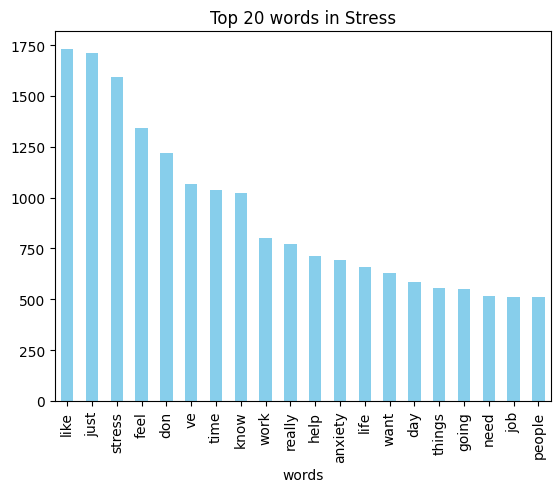

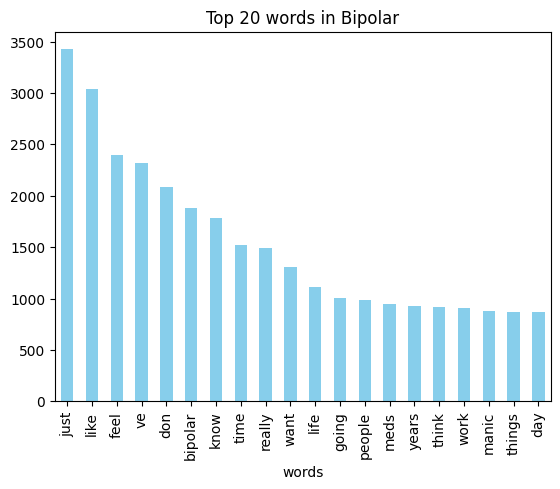

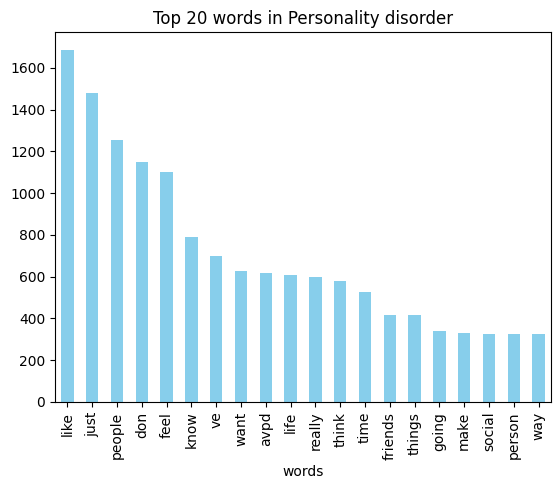

In [29]:
for x in Enfermedades:
    # Obtener las 20 palabras más comunes en las reviews negativas para cada enfermedad
    common_words = get_top_n_words(df[df['status'] == x]['statement'], 20)
    
    # Crear el DataFrame con las palabras y sus frecuencias
    df_temp = pd.DataFrame(common_words, columns=['words', 'count'])
    
    # Agrupar por las palabras y sumar las frecuencias
    df_temp = df_temp.groupby('words').sum().sort_values(by='count', ascending=False)
    
    # Crear el gráfico de barras
    df_temp['count'].plot(
        kind='bar', 
        title=f'Top 20 words in {x}', 
        color='skyblue'
    )
    
    # Mostrar el gráfico
    plt.show()


Vamos a encontrar palabras que estan en las enfermedades pero no en normal

In [42]:
%%time
from collections import Counter

def get_indicative_words(text1, text2, n=20):
    c1 = Counter(text1.lower().split(" "))
    c2 = Counter(text2.lower().split(" "))
    ind_words_1 = (c1 - c2).most_common(n)
    ind_words_2 = (c2 - c1).most_common(n)    
    x, y = zip(*ind_words_2)
    
    df_temp = pd.DataFrame({'word': x, 'count': y})
    df_temp.plot.barh(
        x='word', y='count', figsize=(10,10)
    )



CPU times: user 6 μs, sys: 2 μs, total: 8 μs
Wall time: 10.3 μs


In [33]:
Enfermedades

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [36]:
import numpy as np

Enfermedades_Sin_Normal = np.array(Enfermedades)[[0, 2, 3, 4, 5]]





Vamos a buscar Palabras que estén en los comentarios que 

In [80]:

def get_indicative_words(text1, text2, n=20, title="Indicative Words"):
    from collections import Counter
    import pandas as pd
    import nltk
    from nltk.corpus import stopwords
    
    # Contar palabras
    words1 = [word for word in text1.lower().split() if word not in stop_words]
    words2 = [word for word in text2.lower().split() if word not in stop_words]
    
    c1 = Counter(words1)
    c2 = Counter(words2)
    
    # Palabras más comunes
    ind_words_1 = (c1 - c2).most_common(n)
    ind_words_2 = (c2 - c1).most_common(n)
    
    # Desempaquetar las palabras y frecuencias
    x, y = zip(*ind_words_2)
    
    # Crear el DataFrame
    df = pd.DataFrame({'word': x, 'count': y})
    
    # Generar el gráfico con un título personalizado
    ax = df.plot.barh(x='word', y='count', figsize=(10, 10))
    ax.set_title(title)  # Asignar el título al gráfico

    # Mostrar el gráfico
    plt.show()


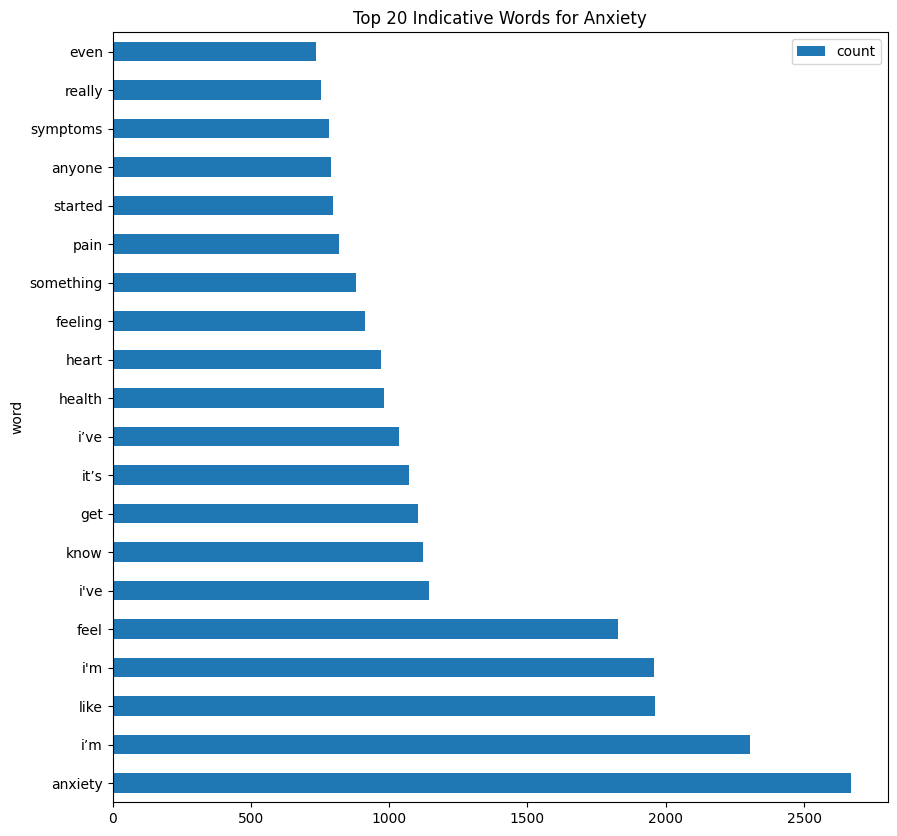

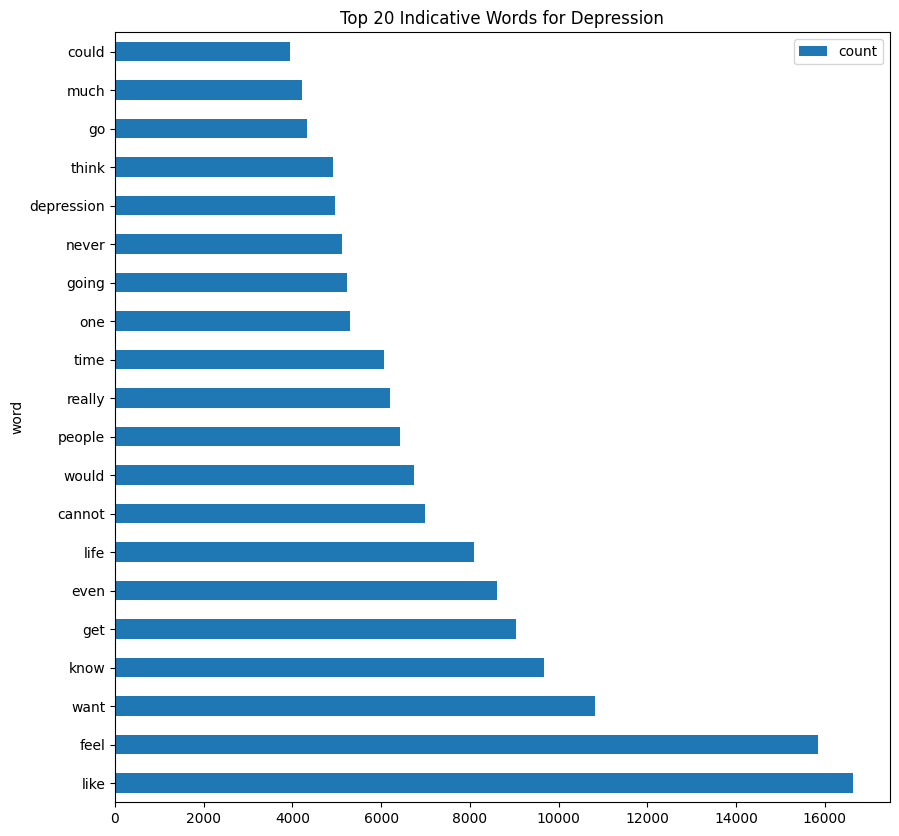

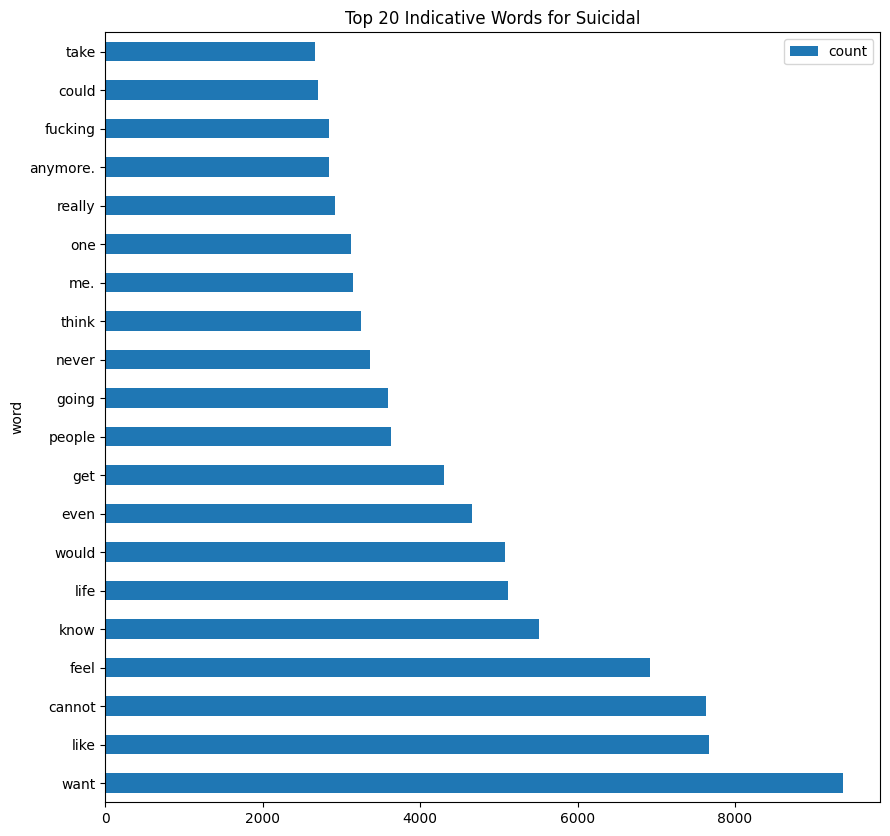

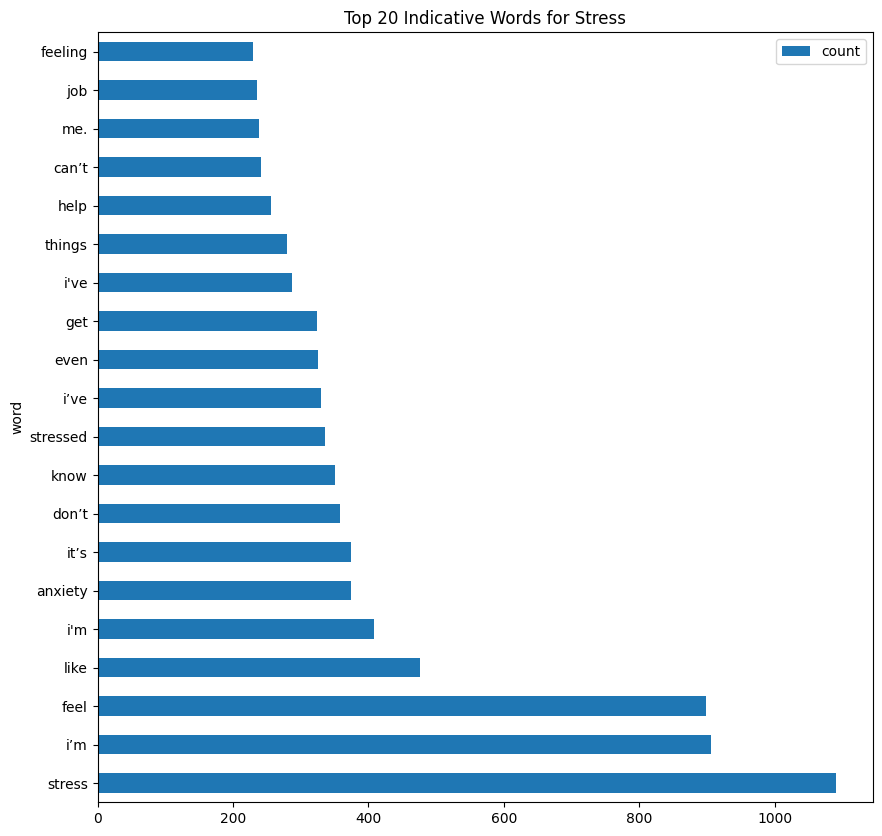

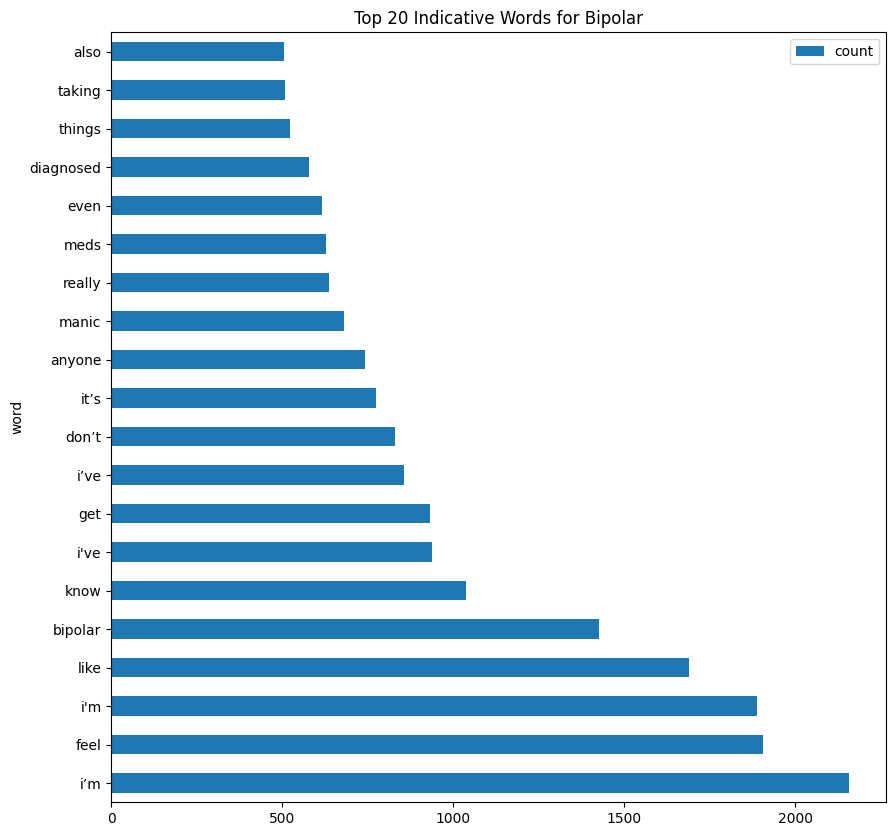

In [81]:
for x in Enfermedades_Sin_Normal:
    # Definir un título único para cada gráfico
    title = f'Top 20 Indicative Words for {x}'
    
    # Llamar a la función con el título personalizado
    get_indicative_words(
        ' '.join(df[df['status'] == 'Normal']['statement']), 
        ' '.join(df[df['status'] == x]['statement']), 
        title=title
    )


# n-grams

emos visto que las palabras individuales no siempre son muy informativas. Busque los bigramas y trigramas más informativos, tanto en reseñas positivas como negativas. Muestre los bigramas y trigramas más informativos y haga un breve análisis de los n-gramas que identificó.

In [83]:
def get_top_n_words(corpus, n=1, k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

Anxiety
Depression
Suicidal
Stress
Bipolar


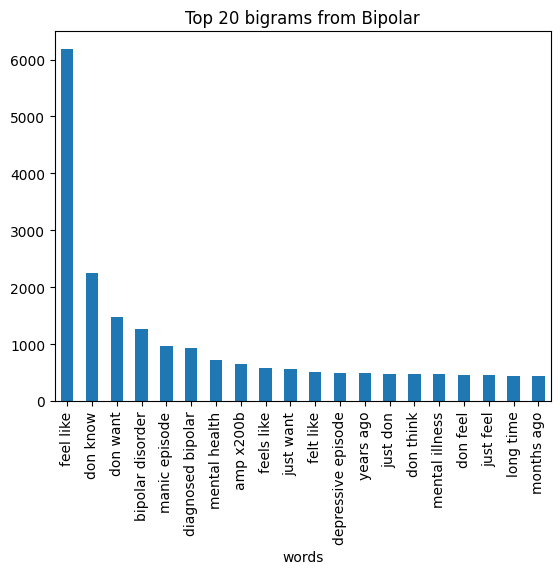

In [90]:
# Bigramas con buenas revisiones
for x in Enfermedades_Sin_Normal:
    common_words = get_top_n_words(df[df['status'] == x]['statement'], 20, 2)
    df_temp = pd.DataFrame(common_words, columns=['words', 'count'])
    df_temp.groupby('words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title=f'Top 20 bigrams from {x}')
    print(x)
    




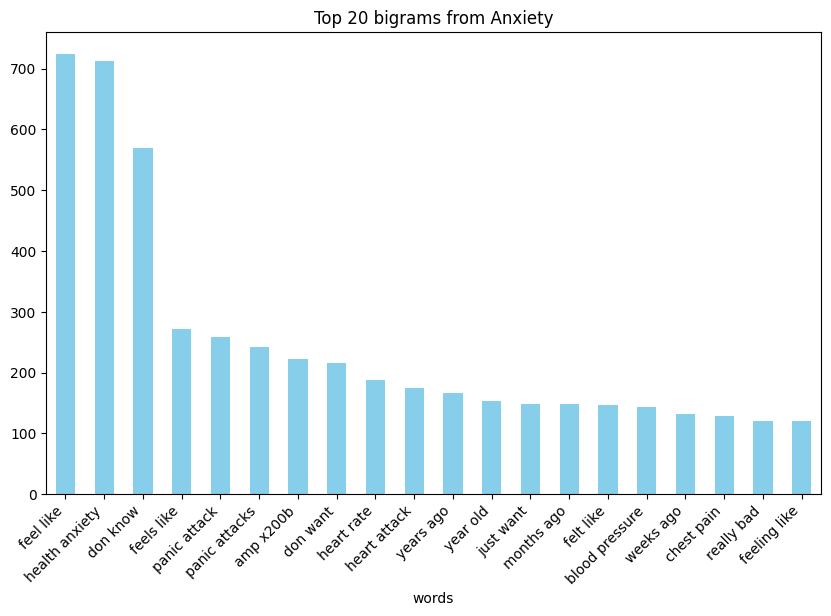

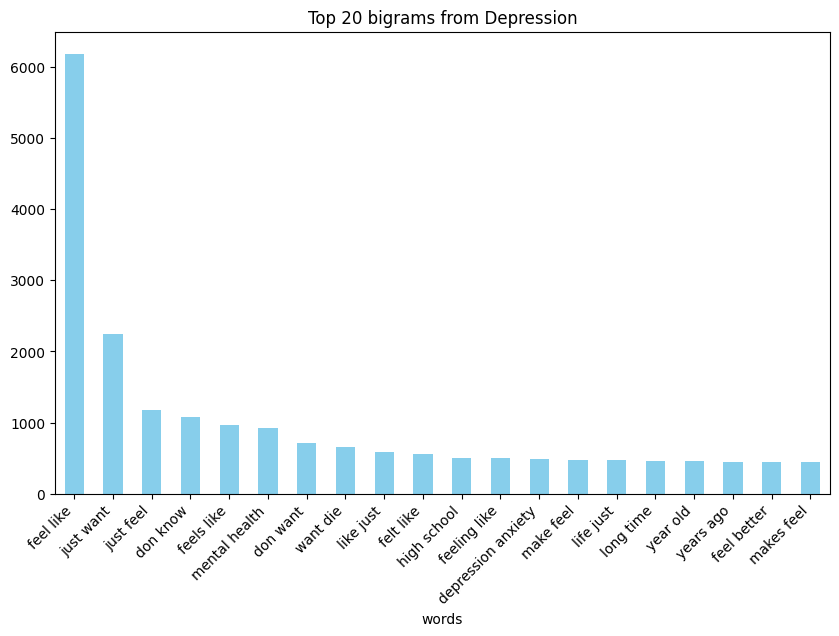

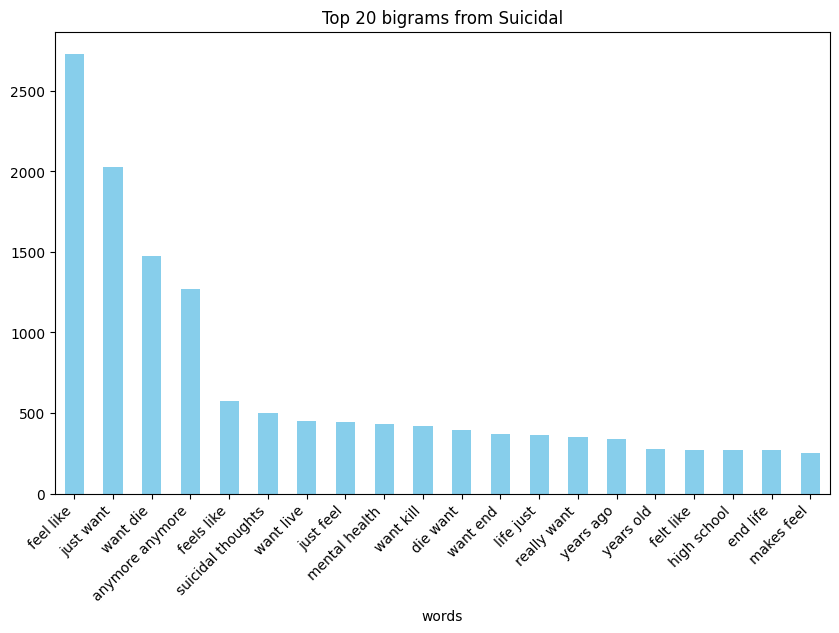

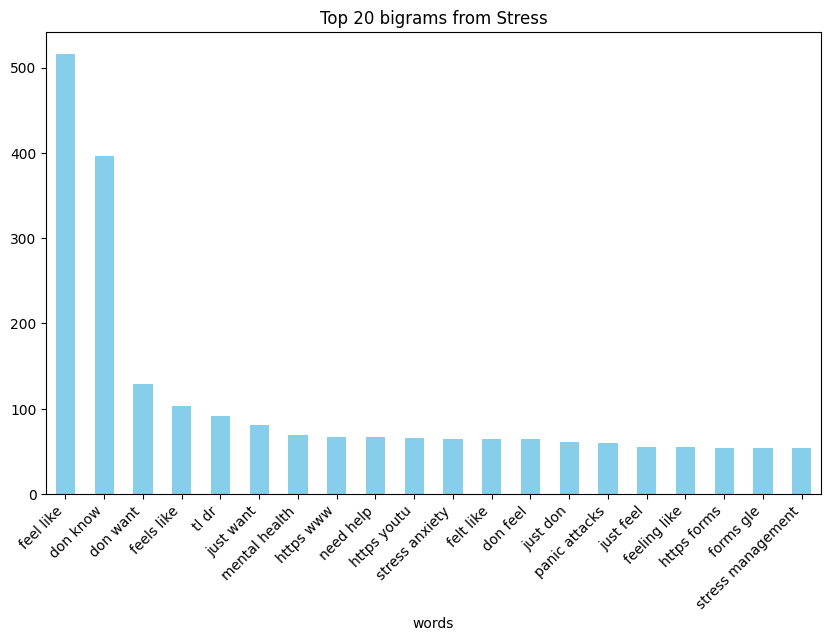

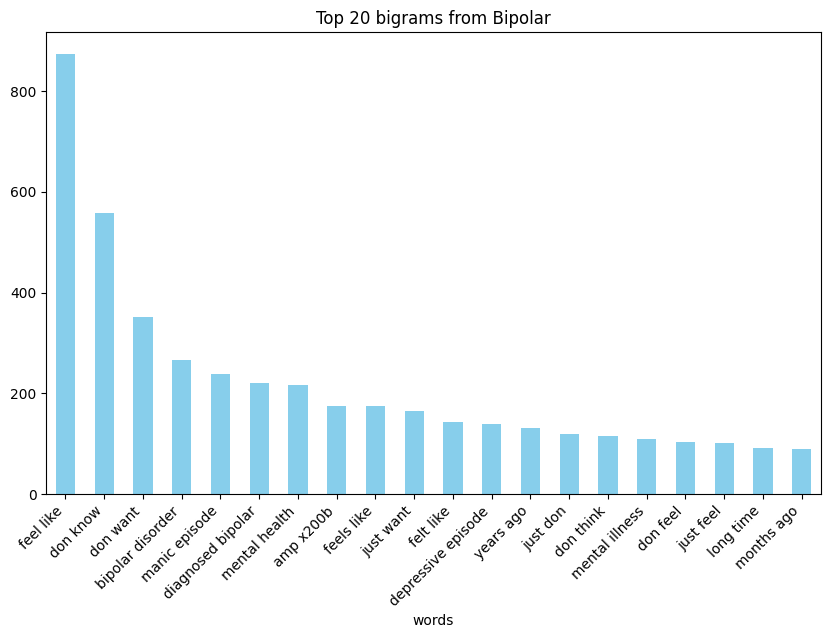

In [91]:
for x in Enfermedades_Sin_Normal:
    # Obtener los bigramas más comunes
    common_words = get_top_n_words(df[df['status'] == x]['statement'], 20, 2)
    
    # Crear un DataFrame con los bigramas y sus frecuencias
    df_temp = pd.DataFrame(common_words, columns=['words', 'count'])
    
    # Agrupar por bigramas y ordenar por frecuencia
    df_temp = df_temp.groupby('words').sum().sort_values(by='count', ascending=False)
    
    # Crear el gráfico de barras
    ax = df_temp['count'].plot(
        kind='bar', 
        title=f'Top 20 bigrams from {x}', 
        figsize=(10, 6),
        color='skyblue'
    )
    
    # Ajustar etiquetas del eje x para que no se sobrepongan
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Mostrar el gráfico
    plt.show()


Ahora el mismo ejercicio con trigramas

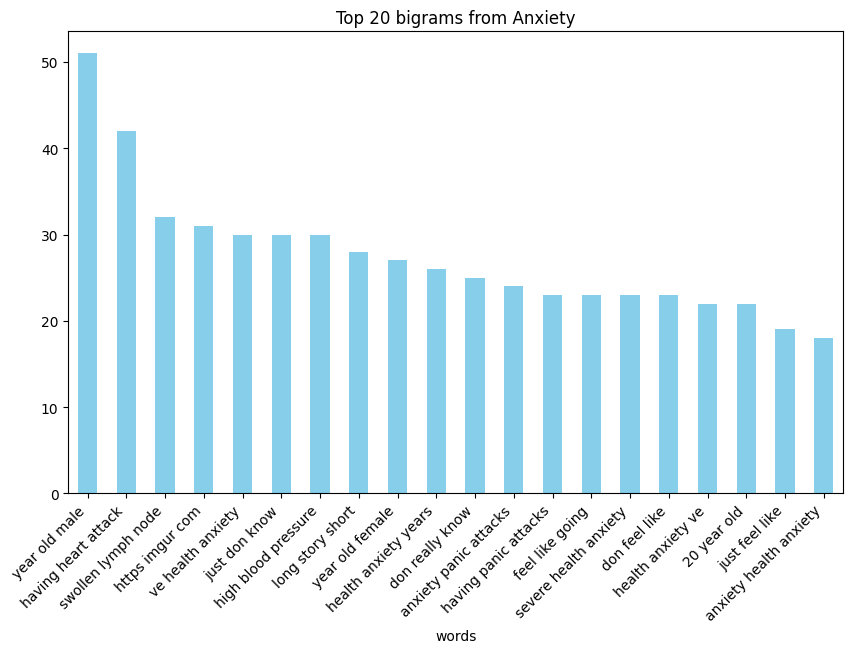

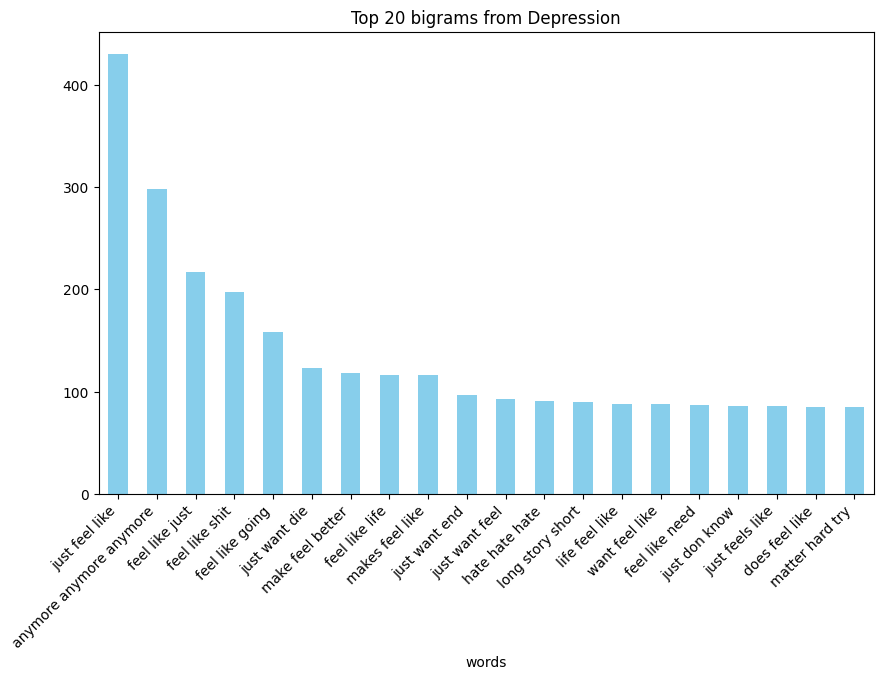

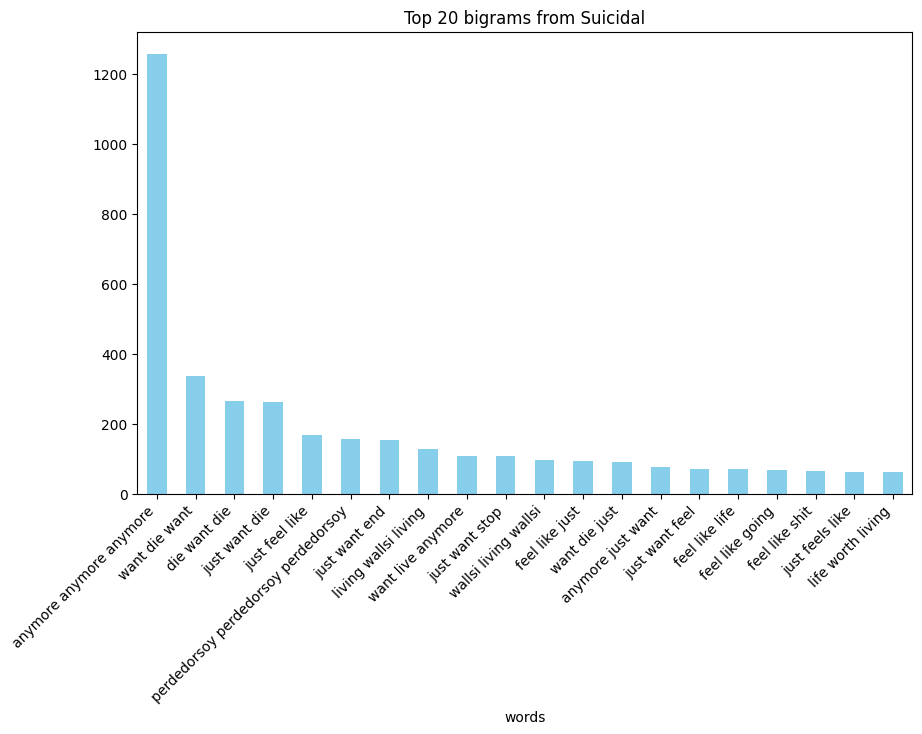

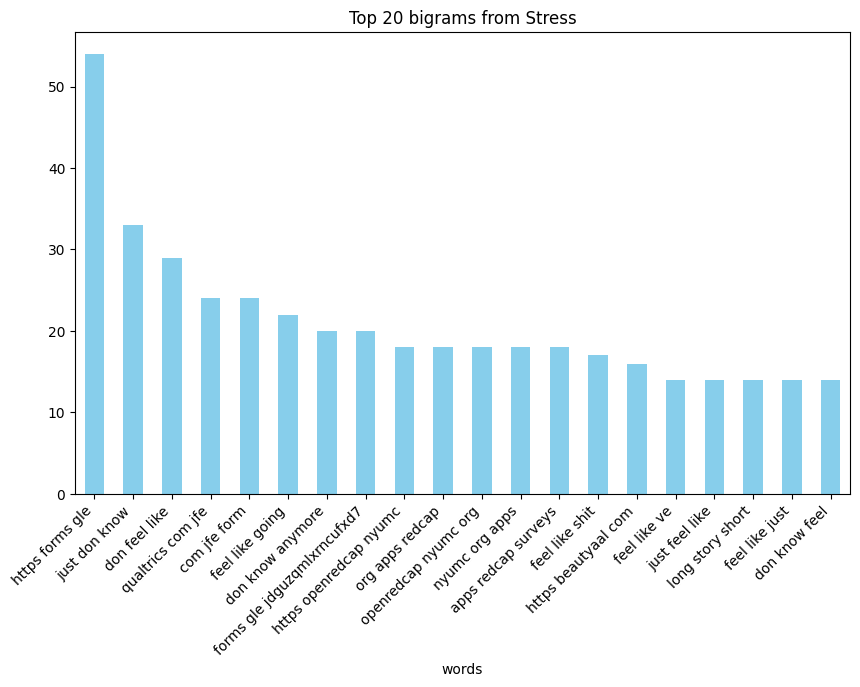

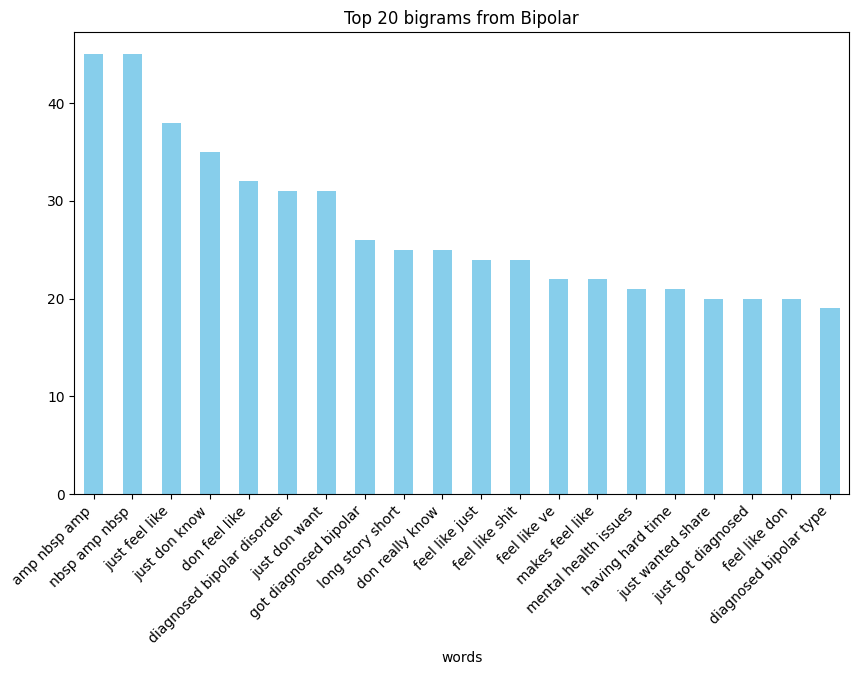

In [94]:
for x in Enfermedades_Sin_Normal:
    # Obtener los bigramas más comunes
    common_words = get_top_n_words(df[df['status'] == x]['statement'], 20, 3)
    
    # Crear un DataFrame con los bigramas y sus frecuencias
    df_temp = pd.DataFrame(common_words, columns=['words', 'count'])
    
    # Agrupar por bigramas y ordenar por frecuencia
    df_temp = df_temp.groupby('words').sum().sort_values(by='count', ascending=False)
    
    # Crear el gráfico de barras
    ax = df_temp['count'].plot(
        kind='bar', 
        title=f'Top 20 bigrams from {x}', 
        figsize=(10, 6),
        color='skyblue'
    )
    
    # Ajustar etiquetas del eje x para que no se sobrepongan
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Mostrar el gráfico
    plt.show()

# Conclusiones
Al analizar las 20 palabras más comunes no nos decian mucho, sin embargo al construir los bigramas y los trigramas si podemos ver claramente expresiones que nos pueden dar idea de como podemos clasificar una enfermedad mental

# Análsis de sentimientos

In [96]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [97]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jjmoras/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [98]:
sia=SentimentIntensityAnalyzer()

In [101]:
sia.polarity_scores(df["statement"].iloc[1000]) # nos devuelve las metricas de nltk

{'neg': 0.158, 'neu': 0.625, 'pos': 0.217, 'compound': 0.3404}

In [115]:
df["compound_score"] = df["statement"].apply(lambda texto: sia.polarity_scores(texto))

/tmp/ipykernel_820/4056854180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["compound_score"] = df["statement"].apply(lambda texto: sia.polarity_scores(texto))


In [116]:
df

,Unnamed: 0,statement,status,len,enfermo,compound_score
0,0,oh my gosh,Anxiety,10,si,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,si,"{'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'comp..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,si,"{'neg': 0.48, 'neu': 0.392, 'pos': 0.127, 'com..."
3,3,I've shifted my focus to something else but I'...,Anxiety,61,si,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp..."
4,4,"I'm restless and restless, it's been a month n...",Anxiety,72,si,"{'neg': 0.276, 'neu': 0.724, 'pos': 0.0, 'comp..."
...,...,...,...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,1766,si,"{'neg': 0.094, 'neu': 0.788, 'pos': 0.118, 'co..."
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012,si,"{'neg': 0.242, 'neu': 0.651, 'pos': 0.107, 'co..."
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety,85,si,"{'neg': 0.118, 'neu': 0.731, 'pos': 0.151, 'co..."
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401,si,"{'neg': 0.144, 'neu': 0.794, 'pos': 0.062, 'co..."


In [131]:
df['compound_score'] = df['compound_score'].apply(lambda x: x['compound'])

/tmp/ipykernel_820/2697311629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound_score'] = df['compound_score'].apply(lambda x: x['compound'])


In [133]:
def asignar_etiqueta(compound_score:float, limit_inf:float=-0.05, limit_sup:float=0.05):
    """_summary_
    Args:
    compound_score (_type_): description
    Returns:
    type: description
    """
    if compound_score >= limit_sup:
    
        return 'positivo'
    elif compound_score <= limit_inf:
        return 'negativo'
    else:
        return 'neutral'

In [135]:
df["sentiment_label"]=df["compound_score"].apply(asignar_etiqueta)

/tmp/ipykernel_820/682400861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment_label"]=df["compound_score"].apply(asignar_etiqueta)


<Axes: >

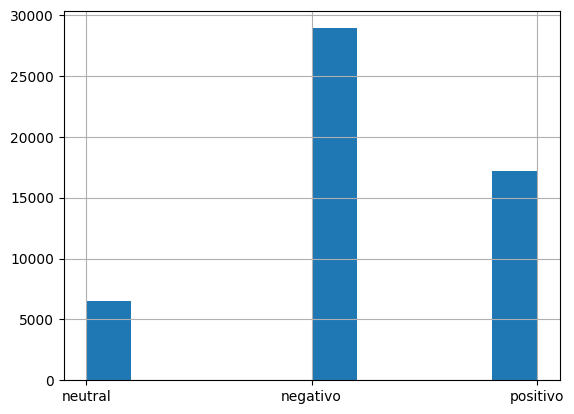

In [137]:
df['sentiment_label'].hist()

In [ ]:
# Contar las frecuencias de cada categoría
frecuencias = df['status'].value_counts()

# Crear el histograma con matplotlib
plt.bar(frecuencias.index, frecuencias.values, color='skyblue')

# Personalizar el gráfico
plt.title('Frecuencia de Enfermedades mentales')
plt.xlabel('Enfermedades mentales')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el layout para evitar que se recorte el gráfico
plt.show()

In [138]:
import seaborn as sns

In [139]:
df

,Unnamed: 0,statement,status,len,enfermo,compound_score,sentiment_label
0,0,oh my gosh,Anxiety,10,si,0.0000,neutral
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,si,-0.7269,negativo
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,si,-0.7351,negativo
3,3,I've shifted my focus to something else but I'...,Anxiety,61,si,-0.4215,negativo
4,4,"I'm restless and restless, it's been a month n...",Anxiety,72,si,-0.4939,negativo
...,...,...,...,...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,1766,si,0.1704,positivo
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012,si,-0.9834,negativo
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety,85,si,0.1635,positivo
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401,si,-0.6853,negativo


/tmp/ipykernel_820/3229585984.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


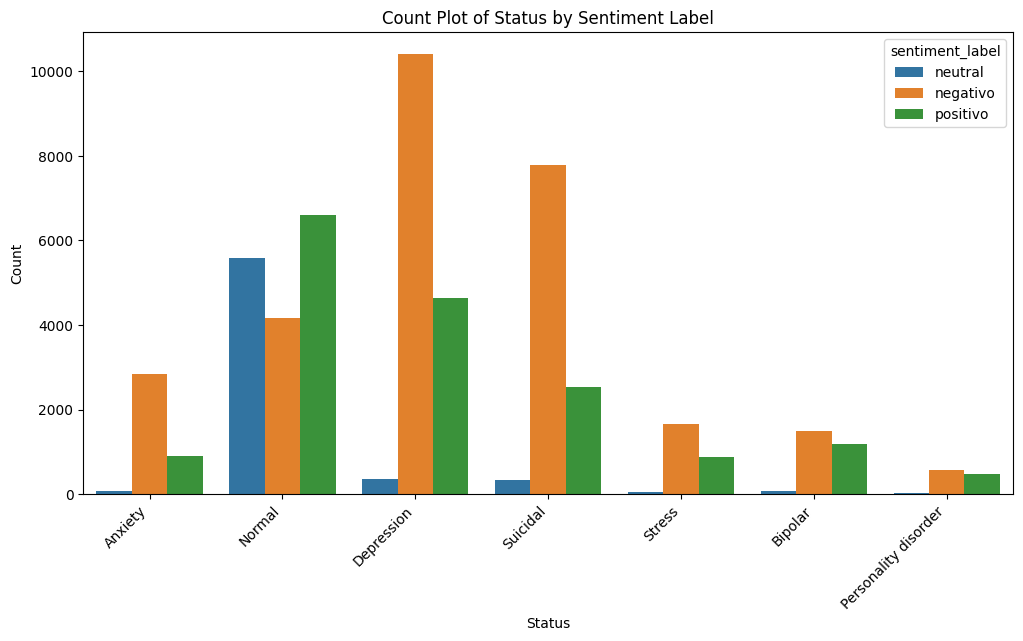

In [144]:


# Crear el gráfico de conteo
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según sea necesario
ax = sns.countplot(x="status", data=df, hue='sentiment_label')

# Ajustar la rotación y el alineamiento de las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Añadir etiquetas y título si es necesario
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count Plot of Status by Sentiment Label')

# Mostrar el gráfico
plt.show()


Claramente se ve que hay una en las enfermedades la mayor parte de los comentarios son negativos, mientras que lo comentarios normales la distribución de los sentimientos es más pareja